# Análisis Exploratorio de Datos

In [115]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

In [74]:
# Import 4 databases
filepath1 = '/home/jupyter-user7/CAMDA/Camda24_resistance/DataSets/ResistanceCiprofloxacinLoose.tsv.gz'
filepath2 = '/home/jupyter-user7/CAMDA/Camda24_resistance/DataSets/ResistanceCiprofloxacinStrict.tsv.gz'
filepath3 = '/home/jupyter-user7/CAMDA/Camda24_resistance/DataSets/ResistanceMeropenemLoose.tsv.gz'
filepath4 = '/home/jupyter-user7/CAMDA/Camda24_resistance/DataSets/ResistanceMeropenemStrict.tsv.gz'

resis_cipro_L = pd.read_csv(filepath1, sep='\t', compression='gzip')
resis_cipro_S = pd.read_csv(filepath2, sep='\t', compression='gzip')
resis_mero_L = pd.read_csv(filepath3, sep='\t', compression='gzip')
resis_mero_S = pd.read_csv(filepath4, sep='\t', compression='gzip')

/tmp/ipykernel_1725917/2616150320.py:7: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  resis_cipro_L = pd.read_csv(filepath1, sep='\t', compression='gzip')
/tmp/ipykernel_1725917/2616150320.py:8: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  resis_cipro_S = pd.read_csv(filepath2, sep='\t', compression='gzip')
/tmp/ipykernel_1725917/2616150320.py:9: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  resis_mero_L = pd.read_csv(filepath3, sep='\t', compression='gzip')


In [75]:
# First view to the databases
print("Cipro Loose size:", resis_cipro_L.shape, 
      "\nCipro Strict size:", resis_cipro_S.shape, 
      "\nMerop Loose size:", resis_mero_L.shape, 
      "\nMerop Strict size:", resis_mero_S.shape)

Cipro Loose size: (3881, 5570) 
Cipro Strict size: (3881, 880) 
Merop Loose size: (3891, 5570) 
Merop Strict size: (3891, 880)


# Ciprofloxacin Resistance Loose Database

In [76]:
# Ciprofloxacin Loose Resistance database
resis_cipro_L.tail()

,accession,genus,species,phenotype,mic,3000535,3005091,3000833,3003665,3007433,...,3003285-S531G,3007051-I572F,3007051-I837V,3003294-D105E,3003394-S66P,3005106-A352E,3003937-N514H,3003937-L546V,3003304-E540V,3003304-E504V
3876,SRR3242343,Salmonella,enterica,NaN,NaN,27.0,18.0,25.0,15.0,11.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3877,SRR2082856,Salmonella,enterica,NaN,NaN,28.0,17.0,27.0,19.0,15.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3878,SRR3242362,Salmonella,enterica,NaN,NaN,25.0,20.0,29.0,23.0,17.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3879,SRR1257300,Salmonella,enterica,NaN,NaN,25.0,18.0,27.0,23.0,14.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3880,SRR4280580,Salmonella,enterica,NaN,NaN,27.0,18.0,29.0,20.0,16.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [77]:
resis_cipro_L.isnull().sum()

accession           0
genus               0
species             0
phenotype        1063
mic              1063
                 ... 
3005106-A352E       0
3003937-N514H       0
3003937-L546V       0
3003304-E540V       0
3003304-E504V       0
Length: 5570, dtype: int64

In [78]:
resis_cipro_L_Train = resis_cipro_L.copy()
resis_cipro_L_Train = resis_cipro_L_Train.dropna()
resis_cipro_L_Train.head()

,accession,genus,species,phenotype,mic,3000535,3005091,3000833,3003665,3007433,...,3003285-S531G,3007051-I572F,3007051-I837V,3003294-D105E,3003394-S66P,3005106-A352E,3003937-N514H,3003937-L546V,3003304-E540V,3003304-E504V
0,SRR3138666,Campylobacter,jejuni,Susceptible,0.12,19.0,10.0,4.0,3.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,SRR3138667,Campylobacter,jejuni,Susceptible,0.06,19.0,6.0,7.0,4.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,SRR3138668,Campylobacter,jejuni,Susceptible,0.06,16.0,7.0,5.0,3.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,SRR3138669,Campylobacter,jejuni,Susceptible,0.06,16.0,7.0,5.0,3.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,SRR3138670,Campylobacter,jejuni,Susceptible,0.06,20.0,8.0,6.0,4.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [79]:
resis_cipro_L_Train.isnull().sum()

accession        0
genus            0
species          0
phenotype        0
mic              0
                ..
3005106-A352E    0
3003937-N514H    0
3003937-L546V    0
3003304-E540V    0
3003304-E504V    0
Length: 5570, dtype: int64

In [80]:
print("Cipro Loose size:", resis_cipro_L.shape, "\nCipro Loose training size:", resis_cipro_L_Train.shape)

Cipro Loose size: (3881, 5570) 
Cipro Loose training size: (2818, 5570)


In [81]:
resis_cipro_L_Test = resis_cipro_L.copy()
resis_cipro_L_Test = resis_cipro_L_Test[resis_cipro_L_Test['phenotype'].isna()]
resis_cipro_L_Test.head()

,accession,genus,species,phenotype,mic,3000535,3005091,3000833,3003665,3007433,...,3003285-S531G,3007051-I572F,3007051-I837V,3003294-D105E,3003394-S66P,3005106-A352E,3003937-N514H,3003937-L546V,3003304-E540V,3003304-E504V
2818,ERR1417717,Escherichia,coli,NaN,NaN,32.0,24.0,23.0,22.0,20.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2819,ERR1417719,Escherichia,coli,NaN,NaN,32.0,24.0,23.0,22.0,20.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2820,ERR1417722,Escherichia,coli,NaN,NaN,32.0,25.0,20.0,25.0,16.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2821,ERR1417741,Escherichia,coli,NaN,NaN,31.0,25.0,21.0,22.0,20.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2822,ERR1417745,Escherichia,coli,NaN,NaN,33.0,24.0,19.0,23.0,17.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [82]:
print("Cipro Loose size:", resis_cipro_L.shape, "\nCipro Loose test size:", resis_cipro_L_Test.shape)

Cipro Loose size: (3881, 5570) 
Cipro Loose test size: (1063, 5570)


In [83]:
# Check for class imbalance
class_counts = resis_cipro_L_Train['phenotype'].value_counts()
print(class_counts)

phenotype
Susceptible    2604
Resistant       214
Name: count, dtype: int64


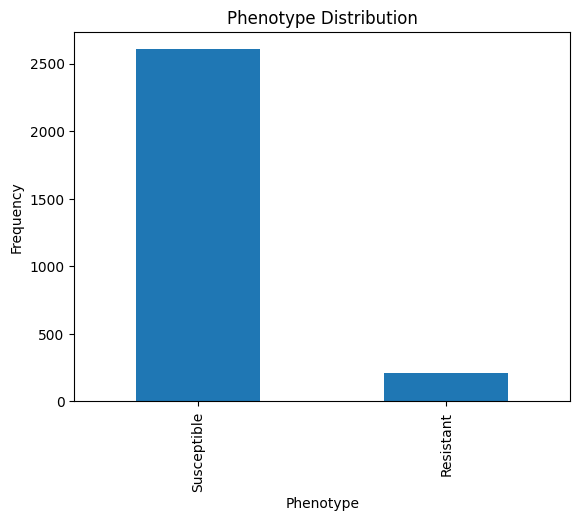

In [84]:
class_counts.plot(kind='bar')
plt.xlabel('Phenotype')
plt.ylabel('Frequency')
plt.title('Phenotype Distribution')
plt.show()

# Class balance
## 1. Unbalanced

In [113]:
# X serán las primeras 5568 columnas (predictoras) y Y serán las dos últimas (outputs)
X = resis_cipro_L_Train.iloc[:,[0, 1, 2] + list(range(5, len(resis_cipro_L_Train)))] # columnas predictoras
Y = resis_cipro_L_Train.iloc[:,[3,4]]  # columnas objetivo

# Suponiendo que Y tiene dos columnas, la primera categórica y la segunda continua
Y_categ = Y.iloc[:, -2]  # Categorical Output (phenotype)
Y_continuous = Y.iloc[:, -1]  # Continuous Output (MIC)

# Dividimos los datos en conjuntos de entrenamiento y prueba
X_train, X_test, Y_categ_train, Y_categ_test, Y_cont_train, Y_cont_test = train_test_split(X, 
                                                                                           Y_categ, 
                                                                                           Y_continuous, 
                                                                                           test_size=0.2, 
                                                                                           random_state=42)


## 1.1 Random Forest Classifier for Cathegorical output

In [114]:
# Instancia del modelo
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Entrenamos el modelo para la variable categórica
rf_classifier.fit(X_train, Y_categ_train)

ValueError: could not convert string to float: 'SRR3664922'

In [ ]:
# Predicción sobre el conjunto de prueba para la variable categórica
Y_categ_pred = rf_classifier.predict(X_test)

# Evaluar la precisión del modelo de clasificación
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_categ_test, Y_categ_pred)
print(f"Accuracy (categórica): {accuracy}")


In [118]:
# Revisa las columnas de X que no son numéricas
non_numeric_columns = X.select_dtypes(exclude=['number']).columns
print(non_numeric_columns)


Index(['accession', 'genus', 'species'], dtype='object')


## 1.2 Random Forest Classifier for Cathegorical output

In [117]:
# Instancia del modelo
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Entrenamos el modelo para la variable continua
rf_regressor.fit(X_train, Y_cont_train)


ValueError: could not convert string to float: 'SRR3664922'

In [ ]:
# Predicción sobre el conjunto de prueba para la variable continua
Y_cont_pred = rf_regressor.predict(X_test)

# Evaluar el modelo de regresión
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_cont_test, Y_cont_pred)
print(f"MSE (continua): {mse}")


# Ciprofloxacin Resistance Strict Database

In [25]:
# Ciprofloxacin Strict Resistance database
resis_cipro_S.head()

,accession,genus,species,phenotype,mic,3005053,3000830,3003838,3000508,3003890,...,3007751-D87Y,3003926-D87Y,3003709-G46S,3004851-A39T,3004832-A501P,3003381-R20H,3003926-S83I,3003381-G121D,3004832-T483S,3004832-A311V
0,SRR3138666,Campylobacter,jejuni,Susceptible,0.12,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,SRR3138667,Campylobacter,jejuni,Susceptible,0.06,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,SRR3138668,Campylobacter,jejuni,Susceptible,0.06,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,SRR3138669,Campylobacter,jejuni,Susceptible,0.06,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,SRR3138670,Campylobacter,jejuni,Susceptible,0.06,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Meropenem Resistance Loose Database

In [26]:
# Meropenem Loose Resistance database
resis_mero_L.head()

,accession,genus,species,phenotype,mic,3000535,3005091,3000833,3003665,3007433,...,3003285-S531G,3007051-I572F,3007051-I837V,3003294-D105E,3003394-S66P,3005106-A352E,3003937-N514H,3003937-L546V,3003304-E540V,3003304-E504V
0,GCA_002947415,Acinetobacter,baumannii,Resistant,8.0,20.0,7.0,19.0,19.0,16.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,GCA_002947845,Acinetobacter,baumannii,Resistant,8.0,18.0,7.0,18.0,18.0,16.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,GCA_002948925,Acinetobacter,baumannii,Resistant,8.0,19.0,6.0,15.0,18.0,14.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,GCA_002996805,Acinetobacter,baumannii,Resistant,8.0,18.0,7.0,19.0,18.0,15.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,GCA_003006035,Acinetobacter,baumannii,Resistant,8.0,20.0,8.0,17.0,21.0,16.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Meropenem Resistance Strict Database

In [29]:
# Meropenem Strict Resistance database
resis_mero_S.head()

,accession,genus,species,phenotype,mic,3005053,3000830,3003838,3000508,3003890,...,3007751-D87Y,3003926-D87Y,3003709-G46S,3004851-A39T,3004832-A501P,3003381-R20H,3003926-S83I,3003381-G121D,3004832-T483S,3004832-A311V
0,GCA_002947415,Acinetobacter,baumannii,Resistant,8.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,GCA_002947845,Acinetobacter,baumannii,Resistant,8.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,GCA_002948925,Acinetobacter,baumannii,Resistant,8.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,GCA_002996805,Acinetobacter,baumannii,Resistant,8.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,GCA_003006035,Acinetobacter,baumannii,Resistant,8.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
